<a href="https://colab.research.google.com/github/lrfurst/Challenge_Telecom_X2/blob/main/Challenge_Teleconm_X2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas essenciais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando os dados diretamente da URL
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Primeira inspeção dos dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [2]:
df.drop('customerID', axis=1, inplace=True)

In [3]:
# Extract TotalCharges from the 'account' column
df['TotalCharges'] = df['account'].apply(lambda x: x.get('TotalCharges'))

# Convert to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill null values with 0
df.fillna({'TotalCharges': 0}, inplace=True)

In [4]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

Colunas object identificadas para correlação antes da codificação: ['customer_gender', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Total']


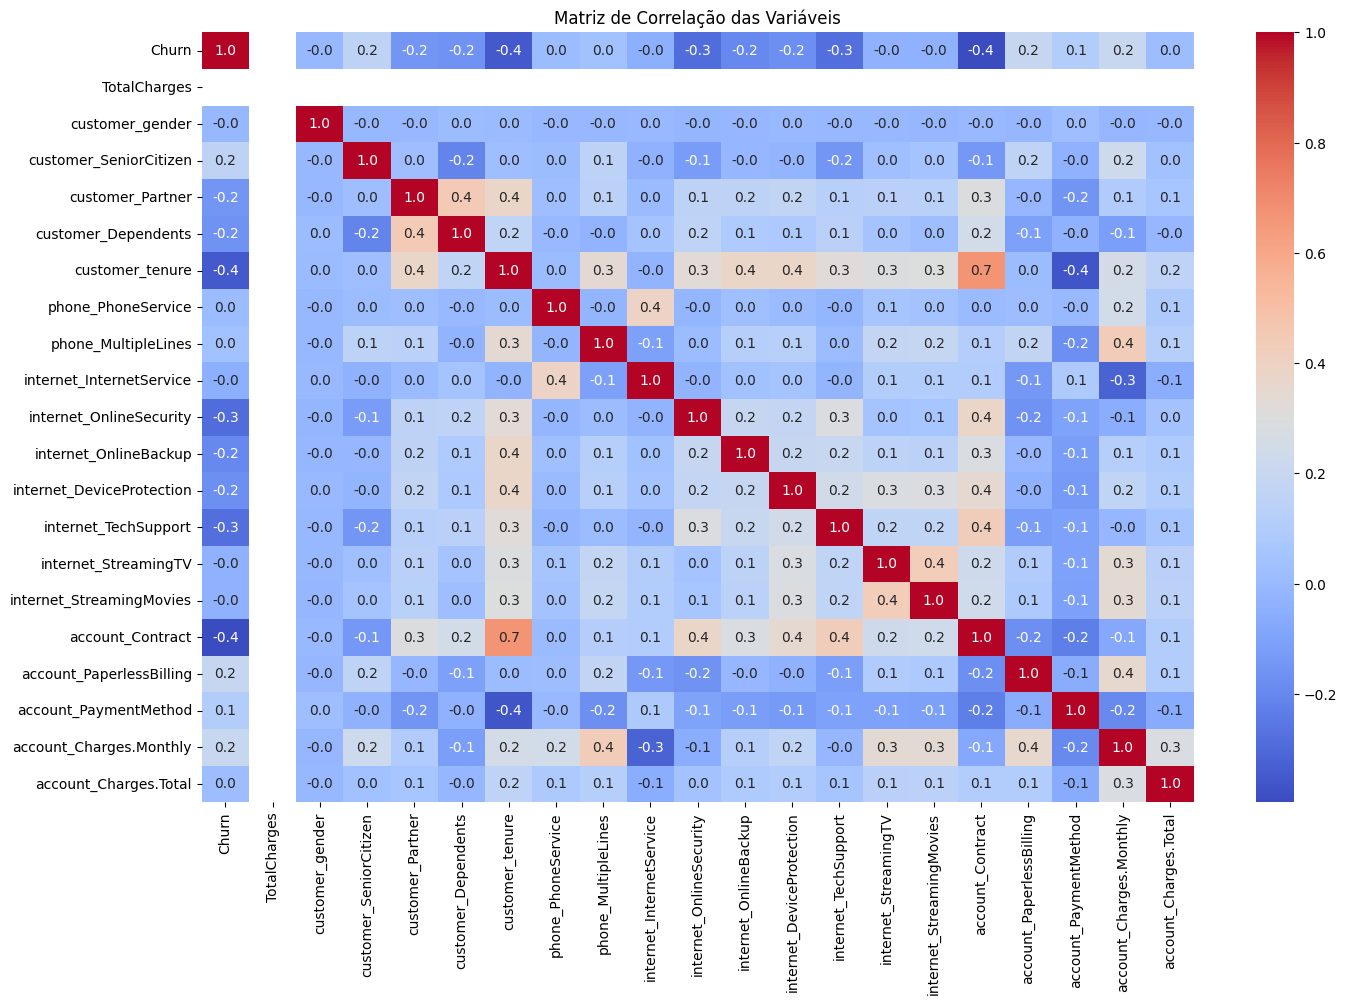

In [8]:
# Para a correlação, precisamos que todas as variáveis sejam numéricas.
# Vamos criar uma cópia do DataFrame atual para a correlação
df_corr = df.copy()

# Função para desagrupar colunas aninhadas (copiada da célula 6d03aab0 para garantir execução antes da correlação)
def flatten_nested_columns_for_corr(df, columns):
    for col in columns:
        # Verificando se a coluna existe e se contém dicionários
        if col in df.columns and isinstance(df[col].iloc[0], dict):
            nested_df = pd.json_normalize(df[col])
            # Renomear colunas para evitar conflitos
            nested_df.columns = [f"{col}_{subcol}" for subcol in nested_df.columns]
            df = pd.concat([df.drop(col, axis=1), nested_df], axis=1)
    return df

# Colunas a serem desagrupadas (copiada da célula 6d03aab0)
nested_cols_for_corr = ['customer', 'phone', 'internet', 'account']

# Desagrupando as colunas no DataFrame de correlação
df_corr = flatten_nested_columns_for_corr(df_corr, nested_cols_for_corr)


# Excluir a coluna 'Churn' das colunas object a serem encodadas, pois já é numérica (0 ou 1)
categorical_cols_for_corr = df_corr.select_dtypes(include='object').columns.tolist()
if 'Churn' in categorical_cols_for_corr:
    categorical_cols_for_corr.remove('Churn')

print("Colunas object identificadas para correlação antes da codificação:", categorical_cols_for_corr)

# Aplicar a codificação categórica nas colunas object restantes
for column in categorical_cols_for_corr:
    df_corr[column] = df_corr[column].astype('category').cat.codes

# Criando o heatmap
plt.figure(figsize=(16, 10))
# Calcular a matriz de correlação no DataFrame codificado
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Matriz de Correlação das Variáveis')
plt.show()

In [9]:
# Função para desagrupar colunas aninhadas
def flatten_nested_columns(df, columns):
    for col in columns:
        # Verificando se a coluna existe e se contém dicionários
        if col in df.columns and isinstance(df[col].iloc[0], dict):
            nested_df = pd.json_normalize(df[col])
            # Renomear colunas para evitar conflitos
            nested_df.columns = [f"{col}_{subcol}" for subcol in nested_df.columns]
            df = pd.concat([df.drop(col, axis=1), nested_df], axis=1)
    return df

# Colunas a serem desagrupadas
nested_cols = ['customer', 'phone', 'internet', 'account']

# Desagrupando as colunas
df = flatten_nested_columns(df, nested_cols)

# Exibindo as primeiras linhas e informações para verificar o resultado
display(df.head())
print(df.info())

,Churn,TotalCharges,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0.0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0.0,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,1.0,0.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,1.0,0.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,1.0,0.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   float64
 1   TotalCharges               7267 non-null   float64
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [10]:
# Separando variáveis numéricas e categóricas
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop('Churn', axis=1).columns

# Aplicando One-Hot Encoding
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Remover linhas com valores nulos na coluna 'Churn'
df_processed.dropna(subset=['Churn'], inplace=True)

# Definindo X (features) e y (alvo)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo 1: Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Modelo 2: Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [13]:
print("--- Regressão Logística ---")
print(classification_report(y_test, y_pred_log))

--- Regressão Logística ---
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1035
         1.0       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [14]:
print("\n--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))


--- Random Forest ---
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1035
         1.0       0.65      0.45      0.53       374

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



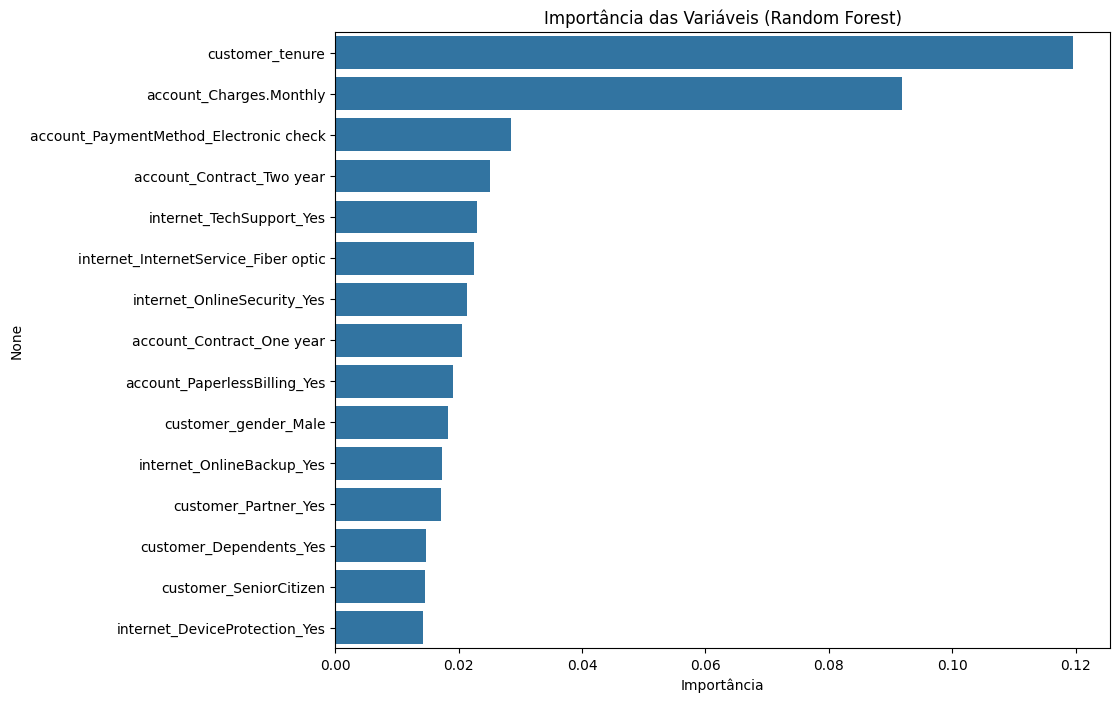

In [15]:
# Obtendo a importância das features do Random Forest
importances = pd.Series(random_forest.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Plotando as 15 mais importantes
plt.figure(figsize=(10, 8))
sns.barplot(x=importances_sorted.head(15), y=importances_sorted.head(15).index)
plt.title('Importância das Variáveis (Random Forest)')
plt.xlabel('Importância')
plt.show()

In [17]:
# Calcular a média do tempo de contrato para clientes que evadiram (Churn=1) e não evadiram (Churn=0)
# Usando df_processed que já teve NaNs em Churn removidos
average_tenure_by_churn = df_processed.groupby('Churn')['customer_tenure'].mean()

print("Média do tempo de contrato por status de Churn:")
print(average_tenure_by_churn)

Média do tempo de contrato por status de Churn:
Churn
0.0    0.212595
1.0   -0.584750
Name: customer_tenure, dtype: float64


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline # Importar Pipeline
from sklearn.preprocessing import StandardScaler # Importar StandardScaler
from sklearn.ensemble import RandomForestClassifier # Importar RandomForestClassifier


# Vamos usar o pipeline do Random Forest
pipe_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])

# 1. Definir a grade de parâmetros que queremos testar
# O nome dos parâmetros deve incluir o nome do passo no pipeline: 'rf__parametro'
param_grid = {
    'rf__n_estimators': [100, 200], # Número de árvores
    'rf__max_depth': [10, 20, None], # Profundidade máxima (None = sem limite)
    'rf__min_samples_leaf': [1, 2, 4], # Mínimo de amostras por nó folha
    'rf__min_samples_split': [2, 5] # Mínimo de amostras para dividir um nó
}
# Nota: Esta é uma grade pequena para demonstração. Em um projeto real, poderíamos testar mais valores.

# 2. Instanciar o GridSearchCV
# Usaremos o 'f1' score como nossa métrica de otimização, pois ele equilibra precisão e recall.
# cv=5 significa que usaremos validação cruzada com 5 folds.
# n_jobs=-1 usa todos os núcleos de CPU disponíveis para acelerar o processo.
grid_search = GridSearchCV(estimator=pipe_rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           verbose=2,
                           n_jobs=-1)

# 3. Treinar!
# Usamos nossos dados de treino
grid_search.fit(X_train, y_train)

# 4. Analisar os resultados da busca
print("\nMelhores parâmetros encontrados:")
print(grid_search.best_params_)

print("\nMelhor score F1 durante a busca (validação cruzada):")
print(grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Melhores parâmetros encontrados:
{'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}

Melhor score F1 durante a busca (validação cruzada):
0.5393751028637261


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline # Importar Pipeline
from sklearn.preprocessing import StandardScaler # Importar StandardScaler
from sklearn.ensemble import RandomForestClassifier # Importar RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # Importar ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Importar matplotlib para exibir o plot

# O melhor estimador já está treinado com os melhores parâmetros nos dados de treino completos
best_rf_model = grid_search.best_estimator_

# Fazendo predições no conjunto de teste
y_pred_rf_optimized = best_rf_model.predict(X_test)

# Relatório de classificação do modelo otimizado
print("\n--- Relatório de Classificação do Random Forest OTIMIZADO ---")
print(classification_report(y_test, y_pred_rf_optimized))

# Nova Matriz de Confusão
print("\n--- Matriz de Confusão do Modelo Otimizado ---")
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, cmap='magma')
plt.title('Random Forest Otimizado')
plt.show()